In [3]:
import pandas as pd
import random
import numpy as np
import os
import glob
import cv2

In [4]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [5]:
def get_data():
    train_dir = "./data/train/"
    X = []
    y = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 64)
            X.append(img)
            y.append(j)
    return X,y

In [6]:
X, y = get_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [7]:
#converted images into numpy array
X = np.asarray(X)
y = np.asarray(y)
print(X.shape,y.shape)

(22424, 64, 64, 3) (22424,)


In [8]:
#X = np.reshape(X, (X.shape[0], -1))

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X[10])

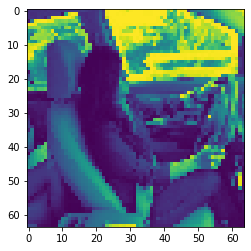

In [10]:
from skimage import color
data_gray = [ color.rgb2gray(i) for i in X]
plt.imshow(data_gray[10])

In [11]:
from skimage.feature import hog
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),
                       cells_per_block=(2, 2),block_norm='L2-Hys',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

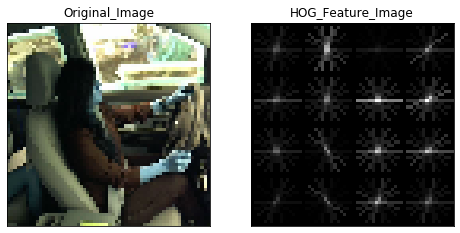

In [12]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(X[10])
ax[0].set_title('Original_Image')
ax[1].imshow(hog_image, cmap='gray')
ax[1].set_title('HOG_Feature_Image')
plt.show()

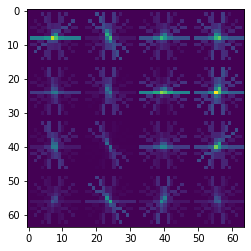

In [13]:
plt.imshow(hog_images[10])

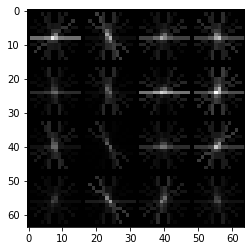

In [14]:
plt.imshow(hog_images[10],cmap="gray")

In [15]:
hog_features = np.array(hog_features)

In [16]:
y=y.reshape((-1,1))

In [17]:
X = np.reshape(X, (X.shape[0], -1))

In [18]:
print("Original Feature Matrix","    ","HOG Feature Matrix")
print("   ",X.shape,"             ",hog_features.shape)

Original Feature Matrix      HOG Feature Matrix
    (22424, 12288)               (22424, 324)


In [19]:
data_frame = np.hstack((hog_features,y))

In [20]:
np.random.shuffle(data_frame)

In [21]:
pd.DataFrame(data_frame)

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,0.220145,0.151030,0.092273,0.106761,0.170782,0.035245,0.129003,0.047964,0.108528,0.254257,...,0.204575,0.087020,0.109512,0.140285,0.215987,0.107761,0.059960,0.085970,0.084008,5.0
1,0.235729,0.085252,0.110505,0.150586,0.249088,0.123973,0.160902,0.146126,0.132967,0.131488,...,0.168226,0.036253,0.065283,0.055183,0.216876,0.095962,0.071273,0.118785,0.214820,0.0
2,0.113376,0.163158,0.255599,0.128318,0.255599,0.076604,0.092497,0.184171,0.142733,0.215737,...,0.057486,0.052094,0.059259,0.170583,0.233991,0.119251,0.084377,0.013312,0.051699,1.0
3,0.166661,0.121834,0.158877,0.099151,0.148929,0.088777,0.044701,0.082076,0.150657,0.239453,...,0.202359,0.042692,0.095177,0.097327,0.227819,0.049943,0.071640,0.076447,0.049352,3.0
4,0.234720,0.039944,0.222305,0.134973,0.234720,0.084469,0.188476,0.234720,0.234720,0.173245,...,0.119880,0.073694,0.180433,0.227898,0.227898,0.131066,0.188325,0.175487,0.163522,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22419,0.262171,0.141415,0.077402,0.119572,0.262171,0.133630,0.169189,0.054744,0.097042,0.262171,...,0.193643,0.011978,0.023091,0.023131,0.181979,0.059148,0.016090,0.003573,0.166011,5.0
22420,0.238564,0.093275,0.182962,0.065224,0.191058,0.116569,0.238564,0.238564,0.238564,0.192046,...,0.110579,0.164770,0.219507,0.196940,0.179262,0.101286,0.144913,0.097038,0.115954,6.0
22421,0.135526,0.257348,0.268884,0.268884,0.268884,0.099968,0.036009,0.133513,0.037746,0.239408,...,0.164688,0.104077,0.200950,0.119038,0.232581,0.217500,0.232581,0.232581,0.181438,9.0
22422,0.252302,0.204643,0.212708,0.073921,0.243683,0.089051,0.231763,0.252302,0.252302,0.252302,...,0.221950,0.104933,0.096467,0.059950,0.254002,0.049314,0.009998,0.062082,0.236475,0.0


In [22]:
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [101]:
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()


In [77]:
print('Training data shape: ', x_train.shape,y_train.shape)
print('Validation data shape: ', x_test.shape,y_test.shape)

Training data shape:  (17939, 324) (17939,)
Validation data shape:  (4485, 324) (4485,)


In [25]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear',C=1.0)
svm_classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
svm_classifier.score(x_test,y_test)

0.8662207357859532

In [27]:
y_predict_train = svm_classifier.predict(x_train)
y_predict_test = svm_classifier.predict(x_test)

In [28]:
def Accuracy(actual,predict):
    acc=np.sum((actual==predict))/actual.shape[0]
    return acc*100

In [29]:
print("Training set Accuracy of SVM With HOG",Accuracy(y_train,y_predict_train))
print("Validation set Accuracy of SVM with HOG",Accuracy(y_test,y_predict_test))

Training set Accuracy of SVM With HOG 88.26021517364401
Validation set Accuracy of SVM with HOG 86.62207357859532


In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict_test)

In [31]:
print(cm)

[[417   3   5  18  17   2   0   0   4  25]
 [  9 445   8   4   2   0  10   2   3   0]
 [ 13   2 381   1   4   0  11   2   9   5]
 [ 38   2   3 360  30   0   2   0   2  13]
 [ 28   3  11  29 379   0   4   0   4   9]
 [  6   0   1   0   0 496   0   0   0   1]
 [  2  24  14   3   0   1 405   2   9   2]
 [  0   2   8   2   1   0   7 395   4   1]
 [  9   5  20   2  11   5   9   2 295   9]
 [ 28  10  10  18  12  10   3   2   8 312]]


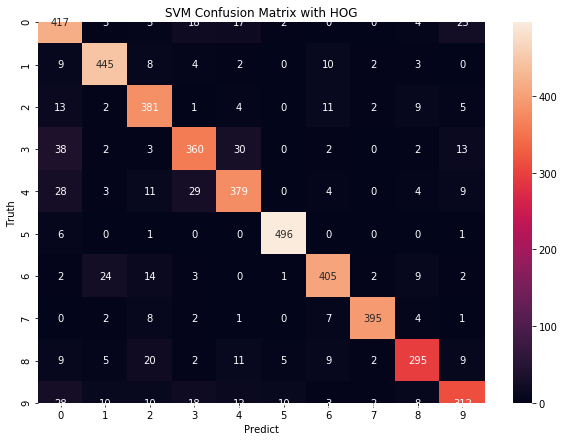

In [32]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("SVM Confusion Matrix with HOG")
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()

In [33]:
from sklearn import metrics
print("SVM Performance Matrics with HOG")
print(metrics.classification_report(y_test, y_predict_test))

SVM Performance Matrics with HOG
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       491
         1.0       0.90      0.92      0.91       483
         2.0       0.83      0.89      0.86       428
         3.0       0.82      0.80      0.81       450
         4.0       0.83      0.81      0.82       467
         5.0       0.96      0.98      0.97       504
         6.0       0.90      0.88      0.89       462
         7.0       0.98      0.94      0.96       420
         8.0       0.87      0.80      0.84       367
         9.0       0.83      0.76      0.79       413

    accuracy                           0.87      4485
   macro avg       0.87      0.86      0.86      4485
weighted avg       0.87      0.87      0.87      4485



In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression(multi_class='ovr', solver='liblinear')

In [36]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_predict_train=model.predict(x_train)

In [38]:
y_predict_test=model.predict(x_test)

In [39]:
#Find the Accuracy
def Accuracy(actual,predict):
    acc=np.sum((actual==predict))/actual.shape[0]
    return acc*100

In [40]:
print("Training Accuracy of LR With HOG",Accuracy(y_train,y_predict_train))
print("Validation set Accuracy of LR With HOG",Accuracy(y_test,y_predict_test))

Training Accuracy of LR With HOG 81.09147667094041
Validation set Accuracy of LR With HOG 79.55406911928651


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
y_predict = classifier.predict(x_test)

In [44]:
def Accuracy(actual,predict):
    acc=np.sum((actual==predict))/actual.shape[0]
    return acc*100

In [45]:
print("Training Accuracy of Random Forest",Accuracy(y_train,classifier.predict(x_train)))
print("Validation set Accuracy of Random Forest",Accuracy(y_test,classifier.predict(x_test)))

Training Accuracy of Random Forest 99.93310663916606
Validation set Accuracy of Random Forest 89.49832775919732


In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn import metrics

In [47]:
mnb=MultinomialNB()
gnb=GaussianNB()

In [48]:
mnb.fit(x_train,y_train)
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred_gnb = gnb.predict(x_test)
y_pred_mnb = mnb.predict(x_test)

In [50]:
print("Training Accuracy of Multinomial Naive Bayes:",metrics.accuracy_score(y_train, mnb.predict(x_train))*100)
print("Validation set Accuracy of Multinomial Naive Bayes:",metrics.accuracy_score(y_test, mnb.predict(x_test))*100)

Training Accuracy of Multinomial Naive Bayes: 45.281230837839345
Validation set Accuracy of Multinomial Naive Bayes: 44.927536231884055


In [51]:
print("Training Accuracy Gaussian Naive Bayes:",metrics.accuracy_score(y_train, gnb.predict(x_train))*100)
print("Validation set Gaussian Naive Bayes:",metrics.accuracy_score(y_test, gnb.predict(x_test))*100)

Training Accuracy Gaussian Naive Bayes: 54.07770778750209
Validation set Gaussian Naive Bayes: 51.95094760312151
